# Secondary EDA and Modeling

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Optional: widen display so lines don’t wrap
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)
# sets default size for figures

## Data Importing

In [4]:
df_org = pd.read_csv('../data/cleaned_ameshousing.csv')
# imports the original cleaned dataset (before subsetting)

In [5]:
columns = ['Overall Qual_codes', 'Exter Qual_codes', 'Kitchen Qual_codes', 'TotRms AbvGrd', 'Total Full Bath', 'Neighborhood', 'Sale Type', 'House Style', 'SalePrice']
# these are the columns I choose to simplify the model

In [6]:
df = df_org[columns]
# creates the dataframe to use for EDA

In [7]:
df['Overall Qual_codes'] = df['Overall Qual_codes'] + 1
# adjusting this, as the codes were off by 1. Fine for modeling, but not for visualizing 

C:\Users\danie\AppData\Local\Temp\ipykernel_2100\1330325654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall Qual_codes'] = df['Overall Qual_codes'] + 1


In [8]:
df.head()
# first 5 rows of the dataframe

,Overall Qual_codes,Exter Qual_codes,Kitchen Qual_codes,TotRms AbvGrd,Total Full Bath,Neighborhood,Sale Type,House Style,SalePrice
0,6,2,2,7,2.0,NAmes,WD,1Story,215000
1,5,2,2,5,1.0,NAmes,WD,1Story,105000
2,6,2,3,6,1.0,NAmes,WD,1Story,172000
3,7,3,4,8,3.0,NAmes,WD,1Story,244000
4,5,2,2,6,2.0,Gilbert,WD,2Story,189900


In [9]:
df_dummies = pd.get_dummies(df, columns=['Neighborhood', 'Sale Type', 'House Style']) 
# this is for modeling. it makes the dummy variables for the nominal (non-numerical) columns. 

## EDA

In [10]:
df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count']).sort_values(by=['mean', 'median'], ascending=[False, False])
# groups the dataframe by neighborhood, calculating the mean, median, and count for each neighborhood

,mean,median,count
Neighborhood,,,
NoRidge,330319.126761,302000.0,71
StoneBr,324229.196078,319000.0,51
NridgHt,322018.265060,317750.0,166
GrnHill,280000.000000,280000.0,2
Veenker,248314.583333,250250.0,24
Timber,247713.619718,232500.0,71
Somerst,229707.324176,225500.0,182
ClearCr,208662.090909,197500.0,44
Crawfor,207550.834951,200624.0,103


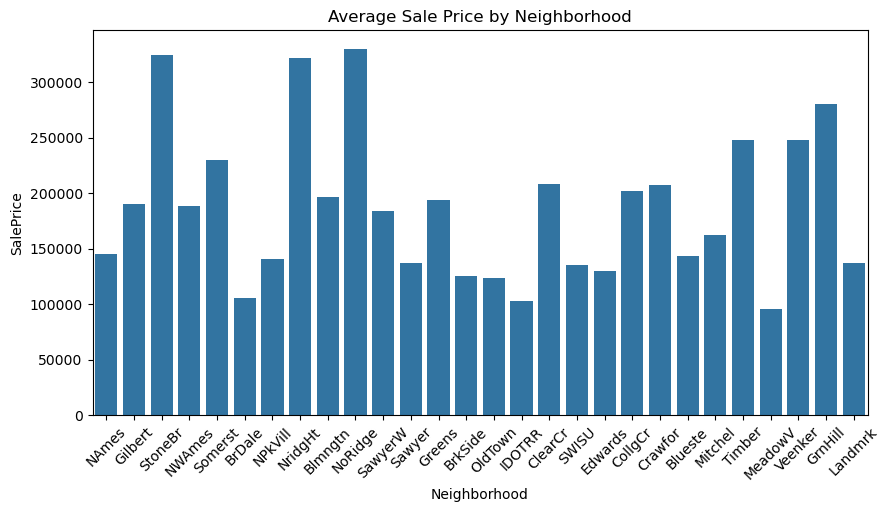

In [11]:
ax = sns.barplot(data=df, x='Neighborhood', y='SalePrice', errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Sale Price by Neighborhood");
# This creates a barplot of the average sale price by neighborhood

> This barplot shows the average sale price of the houses in each neighborhood. We can see that Noridge has the highest average price, while MeadowV has the lowest. 

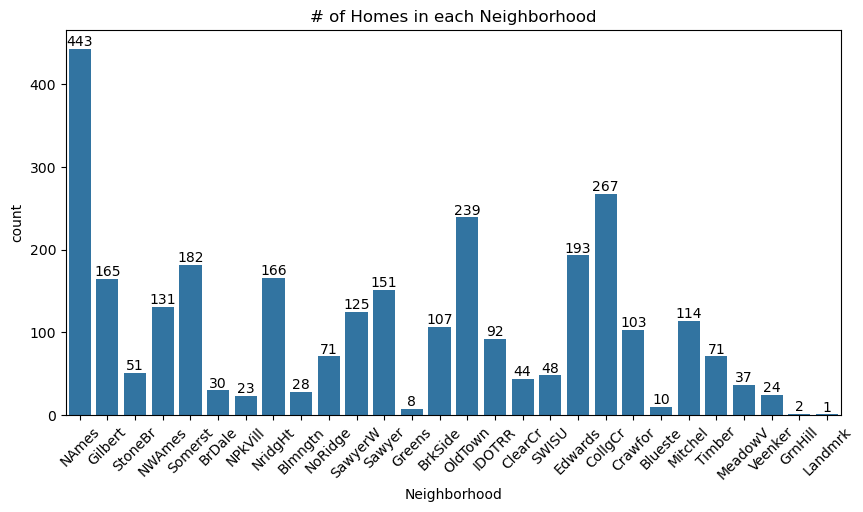

In [12]:
ax = sns.countplot(data=df, x='Neighborhood')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("# of Homes in each Neighborhood");
# this makes a countplot of the number of houses in each neighborhood

> This shows the numebr of houses in each neighborhood in this dataset. We see that NAmes has the most houses, at 443 houses, while Landmrk only has one house. 

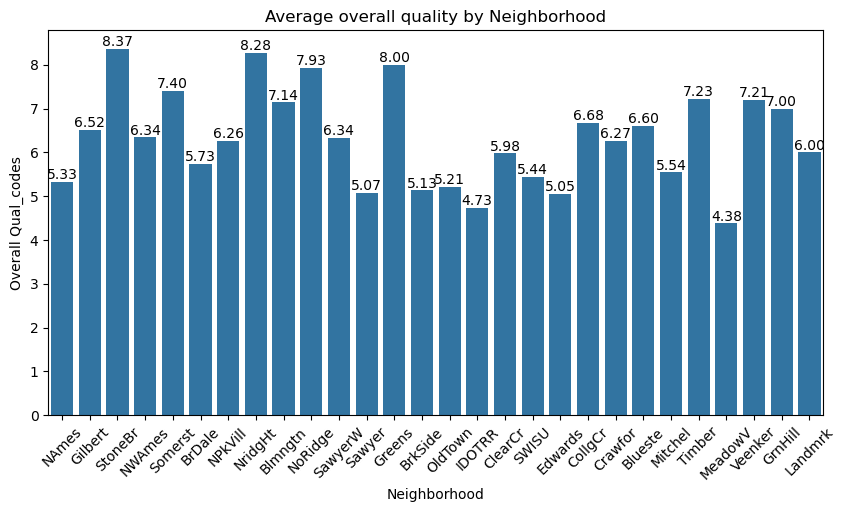

In [13]:
ax = sns.barplot(data=df, x='Neighborhood', y='Overall Qual_codes', errorbar=None)
for container in ax.containers:
    # Use '%.2f' to round the labels to two decimal places
    ax.bar_label(container, fmt='%.2f') 
plt.title("Average overall quality by Neighborhood")
plt.xticks(rotation=45);
# this makes a barplot of the averagw overall quality of houses in each neighborhood. 

> This barplot shows the average overall quality for each neighborhood. Gilbert has the highest average overall quality houses, while TImber has the lowest overall quality houses. 

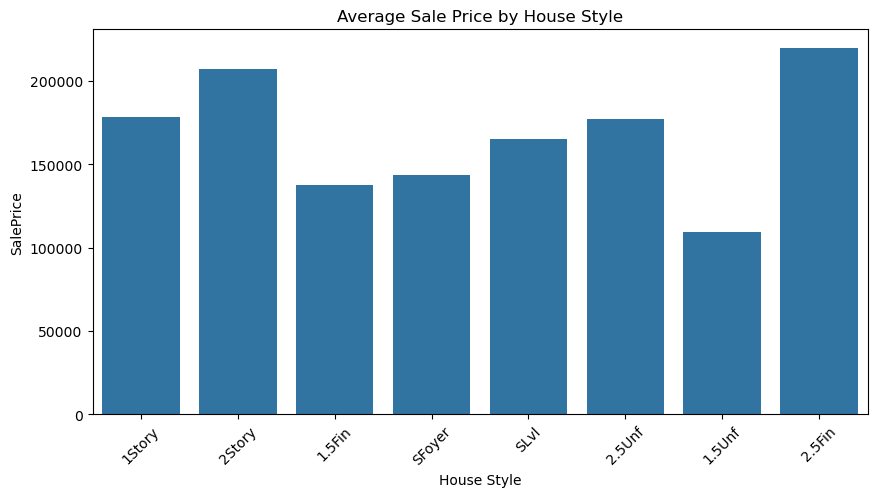

In [14]:
sns.barplot(data=df, x='House Style', y='SalePrice', errorbar=None)
plt.title("Average Sale Price by House Style")
plt.xticks(rotation=45);
# makes a barplot of the average sale price by style of house. 

> Like before with the saleprice by neighborhood, this barplot shows the average saleprice by house style. 

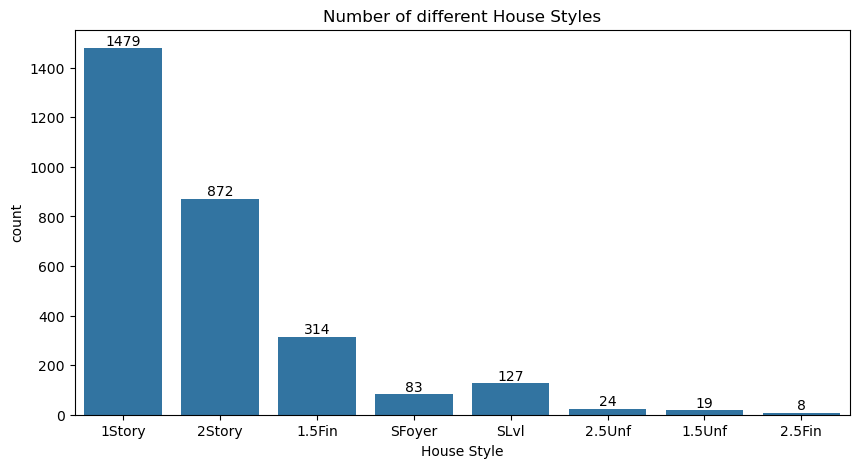

In [15]:
ax = sns.countplot(data=df, x='House Style')
plt.title("Number of different House Styles")
ax.bar_label(ax.containers[0]);
# makes a countplot of the different house styles

> This countplot shows the number of different house styles in this dataset. Most houses are 1 story, while very few are 2.5 stories. 

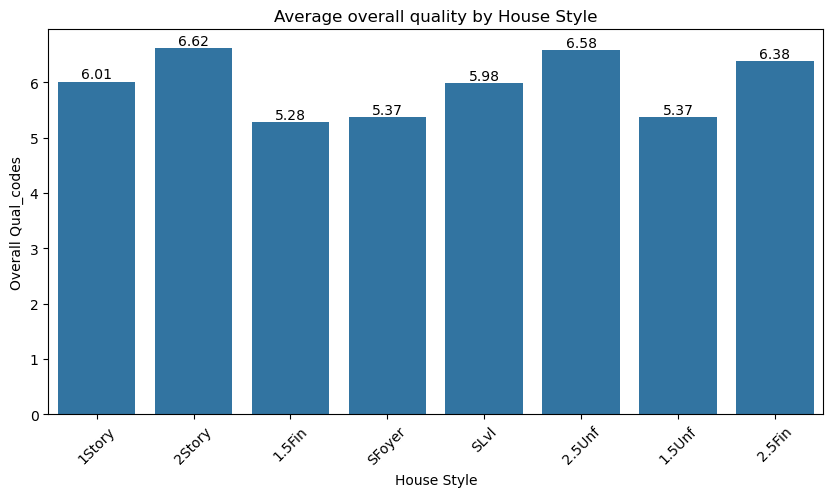

In [16]:
ax = sns.barplot(data=df, x='House Style', y='Overall Qual_codes', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 
plt.title("Average overall quality by House Style")
plt.xticks(rotation=45);
# creates a barplotof the average overall quality by house style

> This is a barplot of the average overall quality for different styles of houses. The house style with the highest average quality is 2story, while the lowest is 1.5 story finished. 

## Modeling

### Linear Regression, Random Forest, Decision Tree

In [17]:
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [18]:
X = df_dummies.drop(columns='SalePrice')
y = df_dummies['SalePrice']

In [19]:
models = {'Linear Regression': lr, 'Random Forest': rf, 'Decision Tree': dt}

In [20]:
sizes = np.arange(0.2, 0.4, 0.01).round(2)
sizes

array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39])

In [21]:
r2_scores = []
rmse_scores = []
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=size)
    for name, model in models.items():
        model.fit(X_train, y_train)
    r2_scores.append({name: model.score(X_test, y_test) for name, model in models.items()})
    y_preds = model.predict(X_test)
    y_mean = y_test.mean()
    baseline_preds = np.full_like(y_test, y_mean)
    rmse_score = {name: root_mean_squared_error(y_test, y_preds) for name, model in models.items()}
    rmse_score['Baseline'] = root_mean_squared_error(y_test, baseline_preds)
    rmse_scores.append(rmse_score)

r2_scores_df = pd.DataFrame(r2_scores)
rmse_scores_df = pd.DataFrame(rmse_scores)

In [22]:
r2_scores_df['test_size'] = sizes
rmse_scores_df['test_size'] = sizes

In [23]:
rmse_scores_df


,Linear Regression,Random Forest,Decision Tree,Baseline,test_size
0,42094.967679,42094.967679,42094.967679,83887.772720,0.20
1,41924.933026,41924.933026,41924.933026,83248.070608,0.21
2,44336.088501,44336.088501,44336.088501,82610.615045,0.22
3,42749.107814,42749.107814,42749.107814,81783.298334,0.23
4,40690.702919,40690.702919,40690.702919,82092.575318,0.24
5,41102.962921,41102.962921,41102.962921,81934.837282,0.25
6,41119.470681,41119.470681,41119.470681,81785.235256,0.26
7,40840.168735,40840.168735,40840.168735,81634.342049,0.27
8,44341.108932,44341.108932,44341.108932,80865.131739,0.28
9,41027.804369,41027.804369,41027.804369,80887.270727,0.29


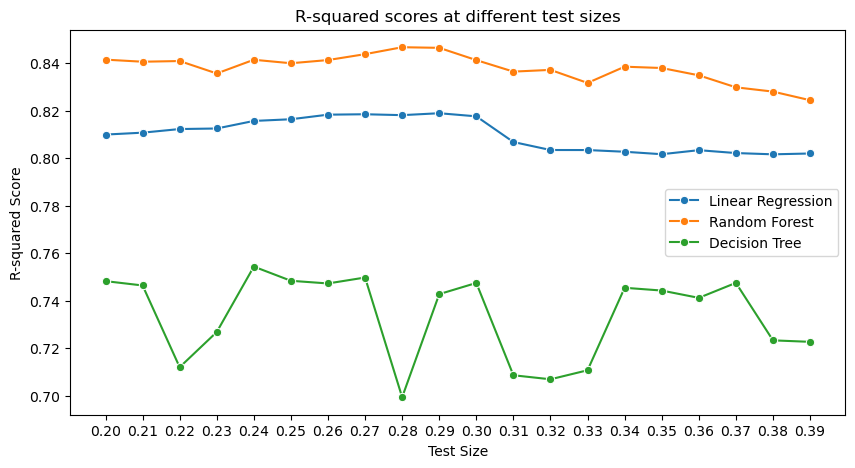

In [24]:
sns.lineplot(data=r2_scores_df, x='test_size', y='Linear Regression', label='Linear Regression', marker='o')
sns.lineplot(data=r2_scores_df, x='test_size', y='Random Forest', label='Random Forest', marker='o')
sns.lineplot(data=r2_scores_df, x='test_size', y='Decision Tree', label='Decision Tree', marker='o')
plt.xlabel("Test Size")
plt.ylabel("R-squared Score")
plt.title("R-squared scores at different test sizes")
plt.xticks(sizes);

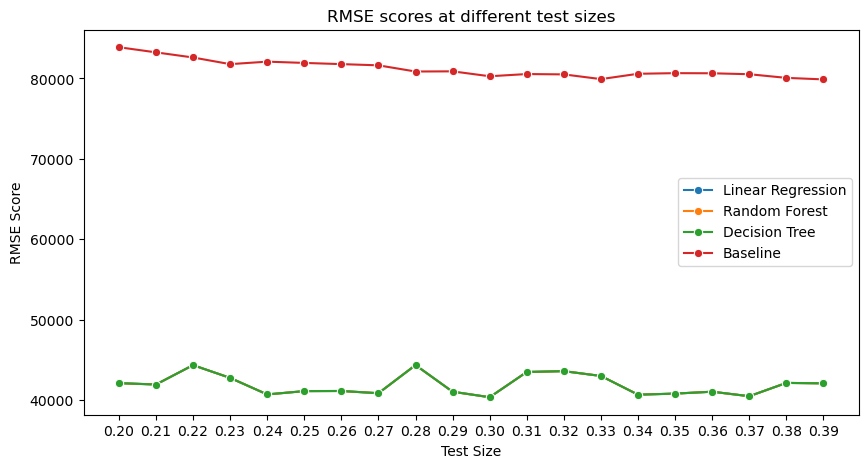

In [25]:
sns.lineplot(data=rmse_scores_df, x='test_size', y='Linear Regression', label='Linear Regression', marker='o')
sns.lineplot(data=rmse_scores_df, x='test_size', y='Random Forest', label='Random Forest', marker='o')
sns.lineplot(data=rmse_scores_df, x='test_size', y='Decision Tree', label='Decision Tree', marker='o')
sns.lineplot(data=rmse_scores_df, x='test_size', y='Baseline', label='Baseline', marker='o')
plt.xlabel("Test Size")
plt.ylabel("RMSE Score")
plt.title("RMSE scores at different test sizes")
plt.xticks(sizes);
# plt.yticks(range(10000,100000,10000))

## KNN

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [27]:
sc =StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [28]:
scores = []

In [29]:
for n in range(3, 30, 2):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_sc, y_train)
    # print(n)
    scores.append({'neighbors': n, 'score': knn.score(X_test_sc, y_test)})

In [30]:
scores_df = pd.DataFrame(scores)

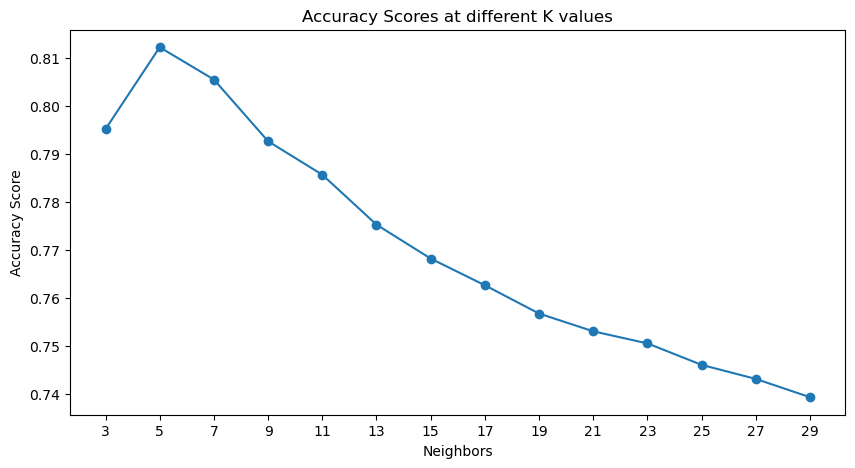

In [31]:
plt.plot(scores_df['neighbors'], scores_df['score'], marker='o')
plt.xlabel("Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores at different K values")
plt.xticks(range(3, 30, 2));